<a href="https://colab.research.google.com/github/PavanTummala/RetinaImageSegmentation-using-Pytorch/blob/main/UNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from pathlib import Path

MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2.Crete Model save path
MODEL_NAME = "01_PyTorch.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3.Save the model
print(f"Save model to : {MODEL_SAVE_PATH}")
#torch.save(obj=model_1.state_dict())

Save model to : models/01_PyTorch.pth


In [4]:
import time
import  torch
import torch.nn as nn

In [5]:
def Seeding(seed):
  np.random.seed(seed)
  os.environ["PYTHONHASHSEED"]=str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic=True

def epoch_time(start_time,end_time):
  elapsed_time=end_time-start_time
  elapsed_mins=int(elapsed_time/60)
  elapsed_secs=int(elapsed_time - (elapsed_mins * 60))
  return elapsed_mins,elapsed_secs

In [6]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
import imageio
from albumentations import HorizontalFlip,VerticalFlip,Rotate
''' mask as y(output)'''
'''Create a directory'''
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_data(path) :
    train_x=sorted(glob(os.path.join(path,"training","images","*.tif")))
    train_y=sorted(glob(os.path.join(path,"training","1st_manual","*.gif")))

    test_x=sorted(glob(os.path.join(path,"test","images","*.tif")))
    test_y=sorted(glob(os.path.join(path,"test","1st_manual","*.gif")))

    return (train_x,train_y),(test_x,test_y)

def augment_data(images,masks,save_path,augment=True,verbose=True):
    size=(512,512)

    for idx,(x,y) in tqdm(enumerate(zip(images,masks)),total=len(images)):
        name=x.split("/")[-1].split(".")[0]
        '''Reading image and mask'''
        x=cv2.imread(x,cv2.IMREAD_COLOR)
        y=imageio.mimread(y)[0]
        #image_show=cv2.imread(x)
        #image_show=cv2.cvtColor(image_show,cv2.COLOR_BGR2RGB)
        print(x.shape,y.shape)

        if augment == True:
            aug = HorizontalFlip(p=1.0) # p=1 refers probability to apply Horizontal flip function is 1, we stire that function in aug variable
            augmented =aug(image=x,mask=y)
            x1=augmented["image"]
            y1=augmented["mask"]

            aug= VerticalFlip(p=1.0)
            augmented=aug(image=x,mask=y) #augmented here is a list with index image and mask
            x2=augmented["image"]
            y2=augmented["mask"]

            aug= Rotate(limit=45,p=1.0)
            augmented=aug(image=x,mask=y)
            x3=augmented["image"]
            y3=augmented["mask"]

            X=[x,x1,x2,x3]
            Y=[y,y1,y2,y3]

        else:
            X=[x]
            Y=[y]

        index=0
        for i,m in zip(X,Y) :
            i=cv2.resize(i,size)
            m=cv2.resize(m,size)

            tmp_image_name =f"{name}_{index}.png"
            tmp_mask_name =f"{name}_{index}.png"

            image_path=os.path.join(save_path,"image",tmp_image_name)
            mask_path=os.path.join(save_path,"mask",tmp_mask_name)

            cv2.imwrite(image_path,i)
            cv2.imwrite(mask_path,m)

            index+=1


if __name__=="__main__":
    """"Seeding"""
    np.random.seed(42)
    """Load Data"""
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    data_path = '/content/drive/MyDrive/Retina Image Segmentation/DRIVE/'
    (train_x,train_y),(test_x,test_y)=load_data(data_path)

    print(f"Train:{len(train_x)}-{len(train_y)}")
    print(f"Test:{len(test_x)}-{len(test_y)}")

    #new_data_path = '/content/drive/MyDrive/Retina Image Segmentation/New_data'  # Change this to your desired path
    """ Create directories to save the augmented data """
    create_dir("drive/MyDrive/Retina Image Segmentation/New_data/train/image/")
    create_dir("drive/MyDrive/Retina Image Segmentation/New_data/train/mask/")
    create_dir("drive/MyDrive/Retina Image Segmentation/New_data/test/image/")
    create_dir("drive/MyDrive/Retina Image Segmentation/New_data/test/mask/")

    '''data augmentation'''
    augment_data(train_x,train_y,"drive/MyDrive/Retina Image Segmentation/New_data/train",augment=True)
    augment_data(train_x,train_y,"drive/MyDrive/Retina Image Segmentation/New_data/test",augment=False)

Mounted at /content/drive
Train:20-20
Test:20-20


  5%|▌         | 1/20 [00:00<00:03,  5.63it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


 10%|█         | 2/20 [00:00<00:03,  5.59it/s]

(584, 565, 3) (584, 565)


 15%|█▌        | 3/20 [00:00<00:02,  5.84it/s]

(584, 565, 3) (584, 565)


 20%|██        | 4/20 [00:00<00:02,  5.80it/s]

(584, 565, 3) (584, 565)


 25%|██▌       | 5/20 [00:00<00:02,  5.75it/s]

(584, 565, 3) (584, 565)


 30%|███       | 6/20 [00:01<00:02,  5.83it/s]

(584, 565, 3) (584, 565)


 35%|███▌      | 7/20 [00:01<00:02,  6.01it/s]

(584, 565, 3) (584, 565)


 40%|████      | 8/20 [00:01<00:01,  6.00it/s]

(584, 565, 3) (584, 565)


 45%|████▌     | 9/20 [00:01<00:01,  6.02it/s]

(584, 565, 3) (584, 565)


 50%|█████     | 10/20 [00:01<00:01,  5.94it/s]

(584, 565, 3) (584, 565)


 55%|█████▌    | 11/20 [00:01<00:01,  6.15it/s]

(584, 565, 3) (584, 565)


 60%|██████    | 12/20 [00:02<00:01,  6.27it/s]

(584, 565, 3) (584, 565)


 70%|███████   | 14/20 [00:02<00:01,  5.99it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


 80%|████████  | 16/20 [00:02<00:00,  6.14it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


 90%|█████████ | 18/20 [00:03<00:00,  6.03it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


100%|██████████| 20/20 [00:03<00:00,  5.97it/s]


(584, 565, 3) (584, 565)


  0%|          | 0/20 [00:00<?, ?it/s]

(584, 565, 3) (584, 565)


 10%|█         | 2/20 [00:00<00:01, 13.45it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


 35%|███▌      | 7/20 [00:00<00:00, 18.12it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


 45%|████▌     | 9/20 [00:00<00:00, 18.39it/s]

(584, 565, 3) (584, 565)


 55%|█████▌    | 11/20 [00:00<00:00, 17.78it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


 75%|███████▌  | 15/20 [00:00<00:00, 17.50it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


 85%|████████▌ | 17/20 [00:00<00:00, 17.58it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


100%|██████████| 20/20 [00:01<00:00, 17.51it/s]


  0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-7-e55f66340af6>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  y_mask = imageio.imread(y, mode='L')  # Load as grayscale


x_img: (584, 565, 3)
y_mask: (584, 565)


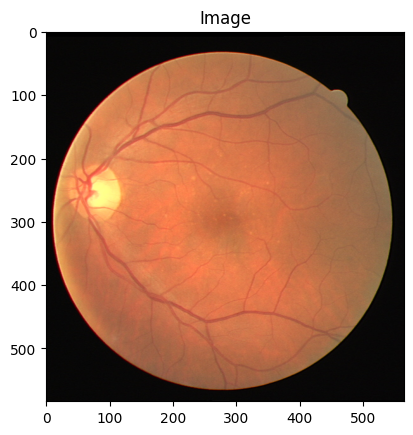

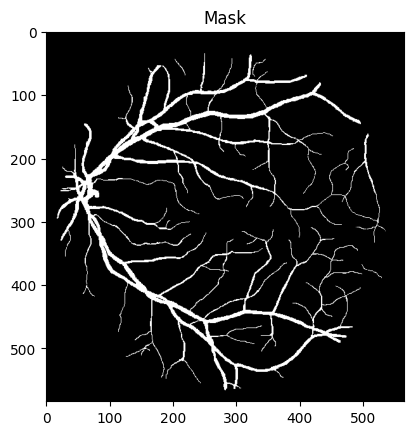

  0%|          | 0/20 [00:01<?, ?it/s]


In [7]:
import cv2
import imageio
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from glob import glob

def augment_data(images, masks, save_path, verbose=True):
    size = (512, 512)

    for idx, (x, y) in tqdm(enumerate(zip(images, masks)), total=len(images)):
        name = x.split("/")[-1].split(".")[0]
        # Reading image
        x_img = cv2.imread(x, cv2.IMREAD_COLOR)
        print("x_img:", x_img.shape)

        # Reading mask image using imageio
        y_mask = imageio.imread(y, mode='L')  # Load as grayscale
        print("y_mask:", y_mask.shape)
        y_mask = y_mask / 255.0

        # Convert image to RGB for display
        x_img_rgb = cv2.cvtColor(x_img, cv2.COLOR_BGR2RGB)

        # Display the image using matplotlib
        plt.imshow(x_img_rgb)
        plt.title("Image")
        plt.show()

        plt.imshow(y_mask, cmap="gray")
        plt.title("Mask")
        plt.show()
        break
data_path = '/content/drive/MyDrive/Retina Image Segmentation/DRIVE/'
(train_x, train_y), (test_x, test_y) = load_data(data_path)

# Call the function with appropriate arguments
augment_data(train_x, train_y, "drive/MyDrive/Retina Image Segmentation/New_data/train")


In [8]:
import torch
import torch.nn as nn

class conv_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.conv1 = nn.Conv2d(in_c, out_c, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_c)

        self.conv2 = nn.Conv2d(out_c, out_c, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_c)

        self.relu = nn.ReLU()

    def forward(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        return x

class encoder_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.conv = conv_block(in_c, out_c)
        self.pool = nn.MaxPool2d((2, 2))

    def forward(self, inputs):
        x = self.conv(inputs)
        p = self.pool(x)

        return x, p

class decoder_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.up = nn.ConvTranspose2d(in_c, out_c, kernel_size=2, stride=2, padding=0)
        self.conv = conv_block(out_c+out_c, out_c)

    def forward(self, inputs, skip):
        x = self.up(inputs)
        x = torch.cat([x, skip], axis=1)
        x = self.conv(x)
        return x

class build_unet(nn.Module):
    def __init__(self):
        super().__init__()

        """ Encoder """
        self.e1 = encoder_block(3, 64)
        self.e2 = encoder_block(64, 128)
        self.e3 = encoder_block(128, 256)
        self.e4 = encoder_block(256, 512)

        """ Bottleneck """
        self.b = conv_block(512, 1024)

        """ Decoder """
        self.d1 = decoder_block(1024, 512)
        self.d2 = decoder_block(512, 256)
        self.d3 = decoder_block(256, 128)
        self.d4 = decoder_block(128, 64)

        """ Classifier """
        self.outputs = nn.Conv2d(64, 1, kernel_size=1, padding=0)

    def forward(self, inputs):
        """ Encoder """
        s1, p1 = self.e1(inputs)
        s2, p2 = self.e2(p1)
        s3, p3 = self.e3(p2)
        s4, p4 = self.e4(p3)

        """ Bottleneck """
        b = self.b(p4)

        """ Decoder """
        d1 = self.d1(b, s4)
        d2 = self.d2(d1, s3)
        d3 = self.d3(d2, s2)
        d4 = self.d4(d3, s1)

        outputs = self.outputs(d4)

        return outputs

if __name__ == "__main__":
    x = torch.randn((2, 3, 512, 512))
    f = build_unet()
    y = f(x)
    print(y.shape)

torch.Size([2, 1, 512, 512])


In [9]:

import torch
import torch.nn as nn
import torch.nn.functional as F

class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = torch.sigmoid(inputs)

        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)

        return 1 - dice

class DiceBCELoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = torch.sigmoid(inputs)

        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        Dice_BCE = BCE + dice_loss

        return Dice_BCE

In [10]:
import os
import numpy as np
import cv2
import torch
from torch.utils.data import Dataset

class DriveDataset(Dataset):
    def __init__(self, images_path, masks_path):

        self.images_path = images_path
        self.masks_path = masks_path
        self.n_samples = len(images_path)

    def __getitem__(self, index):
        """ Reading image """
        image = cv2.imread(self.images_path[index], cv2.IMREAD_COLOR)
        image = image/255.0 ## (512, 512, 3)
        image = np.transpose(image, (2, 0, 1))  ## (3, 512, 512) in pytorch we have channels first that is why we transposed
        image = image.astype(np.float32)
        image = torch.from_numpy(image)

        """ Reading mask """
        mask = cv2.imread(self.masks_path[index], cv2.IMREAD_GRAYSCALE)
        mask = mask/255.0   ## (512, 512)
        mask = np.expand_dims(mask, axis=0) ## (1, 512, 512)
        mask = mask.astype(np.float32)
        mask = torch.from_numpy(mask)

        return image, mask

    def __len__(self):
        return self.n_samples

In [11]:

import os
import time
from glob import glob

import torch
from torch.utils.data import DataLoader
import torch.nn as nn



def train(model, loader, optimizer, loss_fn, device):
    epoch_loss = 0.0

    model.train()
    for x, y in loader:
        x = x.to(device, dtype=torch.float32)
        y = y.to(device, dtype=torch.float32)

        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss = epoch_loss/len(loader)
    return epoch_loss

def evaluate(model, loader, loss_fn, device):
    epoch_loss = 0.0

    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device, dtype=torch.float32)
            y = y.to(device, dtype=torch.float32)

            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            epoch_loss += loss.item()

        epoch_loss = epoch_loss/len(loader)
    return epoch_loss

if __name__ == "__main__":
    """ Seeding """
    Seeding(42)

    """ Directories """
    create_dir("files")

    """ Load dataset """
    train_x = sorted(glob("/content/drive/MyDrive/Retina Image Segmentation/New_data/train/image/*"))
    train_y = sorted(glob("/content/drive/MyDrive/Retina Image Segmentation/New_data/train/mask/*"))

    valid_x = sorted(glob("/content/drive/MyDrive/Retina Image Segmentation/New_data/test/image/*"))
    valid_y = sorted(glob("/content/drive/MyDrive/Retina Image Segmentation/New_data/test/mask/*"))

    data_str = f"Dataset Size:\nTrain: {len(train_x)} - Valid: {len(valid_x)}\n"
    print(data_str)

    """ Hyperparameters """
    H = 512
    W = 512
    size = (H, W)
    batch_size = 2
    num_epochs = 50
    lr = 1e-4
    checkpoint_path = "files/checkpoint.pth"

    """ Dataset and loader """
    train_dataset = DriveDataset(train_x, train_y)
    valid_dataset = DriveDataset(valid_x, valid_y)

    train_loader = DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2
    )

    valid_loader = DataLoader(
        dataset=valid_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2
    )

    device = torch.device('cuda')   ## GTX 1060 6GB
    model = build_unet()
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=True)
    loss_fn = DiceBCELoss()

    """ Training the model """
    best_valid_loss = float("inf")

    for epoch in range(num_epochs):
        start_time = time.time()

        train_loss = train(model, train_loader, optimizer, loss_fn, device)
        valid_loss = evaluate(model, valid_loader, loss_fn, device)

        """ Saving the model """
        if valid_loss < best_valid_loss:
            data_str = f"Valid loss improved from {best_valid_loss:2.4f} to {valid_loss:2.4f}. Saving checkpoint: {checkpoint_path}"
            print(data_str)

            best_valid_loss = valid_loss
            torch.save(model.state_dict(), checkpoint_path)

        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        data_str = f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s\n'
        data_str += f'\tTrain Loss: {train_loss:.3f}\n'
        data_str += f'\t Val. Loss: {valid_loss:.3f}\n'
        print(data_str)


Dataset Size:
Train: 80 - Valid: 20

Valid loss improved from inf to 1.3500. Saving checkpoint: files/checkpoint.pth
Epoch: 01 | Epoch Time: 0m 30s
	Train Loss: 1.167
	 Val. Loss: 1.350

Valid loss improved from 1.3500 to 0.9908. Saving checkpoint: files/checkpoint.pth
Epoch: 02 | Epoch Time: 0m 28s
	Train Loss: 0.983
	 Val. Loss: 0.991

Valid loss improved from 0.9908 to 0.8982. Saving checkpoint: files/checkpoint.pth
Epoch: 03 | Epoch Time: 0m 29s
	Train Loss: 0.924
	 Val. Loss: 0.898

Valid loss improved from 0.8982 to 0.8585. Saving checkpoint: files/checkpoint.pth
Epoch: 04 | Epoch Time: 0m 29s
	Train Loss: 0.877
	 Val. Loss: 0.859

Valid loss improved from 0.8585 to 0.8084. Saving checkpoint: files/checkpoint.pth
Epoch: 05 | Epoch Time: 0m 30s
	Train Loss: 0.836
	 Val. Loss: 0.808

Valid loss improved from 0.8084 to 0.7727. Saving checkpoint: files/checkpoint.pth
Epoch: 06 | Epoch Time: 0m 30s
	Train Loss: 0.797
	 Val. Loss: 0.773

Valid loss improved from 0.7727 to 0.7419. Savin

In [12]:

import os, time
from operator import add
import numpy as np
from glob import glob
import cv2
from tqdm import tqdm
import imageio
import torch
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score



def calculate_metrics(y_true, y_pred):
    """ Ground truth """
    y_true = y_true.cpu().numpy()
    y_true = y_true > 0.5
    y_true = y_true.astype(np.uint8)
    y_true = y_true.reshape(-1)

    """ Prediction """
    y_pred = y_pred.cpu().numpy()
    y_pred = y_pred > 0.5
    y_pred = y_pred.astype(np.uint8)
    y_pred = y_pred.reshape(-1)

    score_jaccard = jaccard_score(y_true, y_pred)
    score_f1 = f1_score(y_true, y_pred)
    score_recall = recall_score(y_true, y_pred)
    score_precision = precision_score(y_true, y_pred)
    score_acc = accuracy_score(y_true, y_pred)

    return [score_jaccard, score_f1, score_recall, score_precision, score_acc]

def mask_parse(mask):
    mask = np.expand_dims(mask, axis=-1)    ## (512, 512, 1)
    mask = np.concatenate([mask, mask, mask], axis=-1)  ## (512, 512, 3)
    return mask

if __name__ == "__main__":
    """ Seeding """
    Seeding(42)

    """ Folders """
    create_dir("results")

    """ Load dataset """
    test_x = sorted(glob("/content/drive/MyDrive/Retina Image Segmentation/New_data/test/image/*"))
    test_y = sorted(glob("/content/drive/MyDrive/Retina Image Segmentation/New_data/test/mask/*"))

    """ Hyperparameters """
    H = 512
    W = 512
    size = (W, H)
    checkpoint_path = "files/checkpoint.pth"

    """ Load the checkpoint """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = build_unet()
    model = model.to(device)
    model.load_state_dict(torch.load(checkpoint_path, map_location=device))
    model.eval()

    metrics_score = [0.0, 0.0, 0.0, 0.0, 0.0]
    time_taken = []

    for i, (x, y) in tqdm(enumerate(zip(test_x, test_y)), total=len(test_x)):
        """ Extract the name """
        name = x.split("/")[-1].split(".")[0]

        """ Reading image """
        image = cv2.imread(x, cv2.IMREAD_COLOR) ## (512, 512, 3)
        ## image = cv2.resize(image, size)
        x = np.transpose(image, (2, 0, 1))      ## (3, 512, 512)
        x = x/255.0
        x = np.expand_dims(x, axis=0)           ## (1, 3, 512, 512)
        x = x.astype(np.float32)
        x = torch.from_numpy(x)
        x = x.to(device)

        """ Reading mask """
        mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)  ## (512, 512)
        ## mask = cv2.resize(mask, size)
        y = np.expand_dims(mask, axis=0)            ## (1, 512, 512)
        y = y/255.0
        y = np.expand_dims(y, axis=0)               ## (1, 1, 512, 512)
        y = y.astype(np.float32)
        y = torch.from_numpy(y)
        y = y.to(device)

        with torch.no_grad():
            """ Prediction and Calculating FPS """
            start_time = time.time()
            pred_y = model(x)
            pred_y = torch.sigmoid(pred_y)
            total_time = time.time() - start_time
            time_taken.append(total_time)


            score = calculate_metrics(y, pred_y)
            metrics_score = list(map(add, metrics_score, score))
            pred_y = pred_y[0].cpu().numpy()        ## (1, 512, 512)
            pred_y = np.squeeze(pred_y, axis=0)     ## (512, 512)
            pred_y = pred_y > 0.5
            pred_y = np.array(pred_y, dtype=np.uint8)

        """ Saving masks """
        ori_mask = mask_parse(mask)
        pred_y = mask_parse(pred_y)
        line = np.ones((size[1], 10, 3)) * 128

        cat_images = np.concatenate(
            [image, line, ori_mask, line, pred_y * 255], axis=1
        )
        cv2.imwrite(f"results/{name}.png", cat_images)

    jaccard = metrics_score[0]/len(test_x)
    f1 = metrics_score[1]/len(test_x)
    recall = metrics_score[2]/len(test_x)
    precision = metrics_score[3]/len(test_x)
    acc = metrics_score[4]/len(test_x)
    print(f"Jaccard: {jaccard:1.4f} - F1: {f1:1.4f} - Recall: {recall:1.4f} - Precision: {precision:1.4f} - Acc: {acc:1.4f}")

    fps = 1/np.mean(time_taken)
    print("FPS: ", fps)


100%|██████████| 20/20 [00:10<00:00,  1.85it/s]

Jaccard: 0.8713 - F1: 0.9311 - Recall: 0.9352 - Precision: 0.9272 - Acc: 0.9881
FPS:  73.7945303812969
